In [ ]:
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [ ]:
header = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_8)'}

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page=2", headers = header)
html = BeautifulSoup(url.text)

last_page = int(html.find('td', class_ = 'pgRR').find('a')['href'].split('=')[-1])

total = []

for n in range(1, last_page + 1):

  url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(n), headers = header, verify = False)
  html = BeautifulSoup(url.text)

  table = html.find('table')
  table = pd.read_html(str(table))[0].dropna()
  total.append(table)
  time.sleep(0.3)

  print('{}페이지 크롤링 완료...'.format(n))

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


1페이지 크롤링 완료...


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2페이지 크롤링 완료...


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


3페이지 크롤링 완료...


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


4페이지 크롤링 완료...


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


5페이지 크롤링 완료...


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


6페이지 크롤링 완료...


KeyboardInterrupt: ignored

Epoch 1/100
151/151 [==============================] - 2s 6ms/step - loss: 0.2062 - val_loss: 0.0311
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0153 - val_loss: 0.0037
Epoch 3/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 4/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 5/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 7/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 8/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 9/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 10/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0039 - val_lo

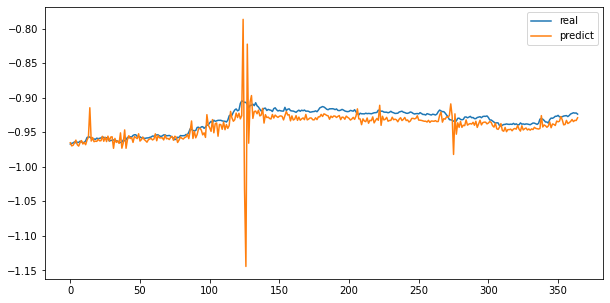

In [ ]:
import pickle

f = open('data.dat', 'rb')
total = pickle.load(f)
f.close()

df = pd.concat(total, ignore_index=True)
df = df[::-1]

df.index = df['날짜']
del df['전일비']
del df['날짜']

stock2 = df.to_numpy()

mean = np.mean(stock2, axis = 0)
std = np.std(stock2, axis = 0)

stock3 = (stock2 - mean) / std

data = []
target = []

window = 10

for i in range(len(stock3) - window):
  
  data.append(stock3[i:i+window])
  target.append(stock3[i+window, 0])

data = np.array(data)
target = np.array(target)

data1 = data[:-365]
data2 = data[-365:]

target1 = target[:-365]
target2 = target[-365:]

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(10, activation='relu', input_shape=(10,5)))
model.add(keras.layers.Dense(1))

model.compile(loss = 'mean_squared_error', optimizer='adam')

early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

train_input, test_input, train_target, test_target = train_test_split(data1, target1, test_size=0.2)

model.fit(train_input, train_target, validation_data = (test_input, test_target), epochs=100, callbacks = [early_stopping])

plt.figure(figsize = (10, 5))
plt.plot(target2)
plt.plot(model.predict(data2))
plt.legend(['real', 'predict'])

In [ ]:
df = pd.concat(total, ignore_index=True)
df = df[::-1]
df

,날짜,종가,전일비,시가,고가,저가,거래량
6408,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
6407,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
6406,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
6405,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
6404,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
4,2021.12.23,79900.0,500.0,79800.0,80000.0,79300.0,13577498.0
3,2021.12.24,80500.0,600.0,80200.0,80800.0,80200.0,12086380.0
2,2021.12.27,80200.0,300.0,80600.0,80600.0,79800.0,10783368.0
1,2021.12.28,80300.0,100.0,80200.0,80400.0,79700.0,18226325.0


In [ ]:
df.index = df['날짜']
df

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,
1996.06.25,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
1996.06.26,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
1996.06.27,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
1996.06.28,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
1996.06.29,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
2021.12.23,2021.12.23,79900.0,500.0,79800.0,80000.0,79300.0,13577498.0
2021.12.24,2021.12.24,80500.0,600.0,80200.0,80800.0,80200.0,12086380.0
2021.12.27,2021.12.27,80200.0,300.0,80600.0,80600.0,79800.0,10783368.0


In [ ]:
del df['전일비']
del df['날짜']

df

,종가,시가,고가,저가,거래량
날짜,,,,,
1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0
1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...
2021.12.23,79900.0,79800.0,80000.0,79300.0,13577498.0
2021.12.24,80500.0,80200.0,80800.0,80200.0,12086380.0
2021.12.27,80200.0,80600.0,80600.0,79800.0,10783368.0


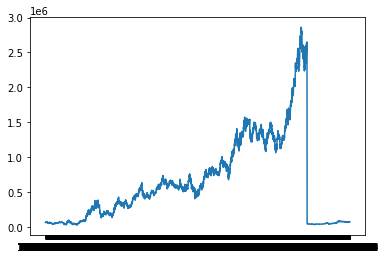

In [ ]:
plt.plot(df['종가'])

In [ ]:
stock2 = df.to_numpy()
stock2

array([[   67500.,    66500.,    68300.,    65600.,   112960.],
       [   67700.,    67600.,    67900.,    66000.,   136630.],
       [   66900.,    67500.,    67700.,    66700.,   155450.],
       ...,
       [   80200.,    80600.,    80600.,    79800., 10783368.],
       [   80300.,    80200.,    80400.,    79700., 18226325.],
       [   79300.,    80200.,    80200.,    79300.,  8472962.]])

In [ ]:
mean = np.mean(stock2, axis = 0)
std = np.std(stock2, axis = 0)

In [ ]:
stock3 = (stock2 - mean) / std
stock3

array([[-0.94318126, -0.94479604, -0.94506277, -0.94324847, -0.39971591],
       [-0.94285468, -0.94299599, -0.94571148, -0.94258773, -0.3960504 ],
       [-0.944161  , -0.94315963, -0.94603583, -0.94143142, -0.39313596],
       ...,
       [-0.92244342, -0.92172268, -0.92511495, -0.91979192,  1.25269182],
       [-0.92228013, -0.92237725, -0.92543931, -0.91995711,  2.40530002],
       [-0.92391303, -0.92237725, -0.92576366, -0.92061786,  0.89490487]])

In [ ]:
data = []
target = []

window = 10

for i in range(len(stock3) - window):
  
  data.append(stock3[i:i+window])
  target.append(stock3[i+window, 0])

In [ ]:
data[0]

array([[ 67500.,  66500.,  68300.,  65600., 112960.],
       [ 67700.,  67600.,  67900.,  66000., 136630.],
       [ 66900.,  67500.,  67700.,  66700., 155450.],
       [ 68100.,  67300.,  68500.,  67200., 138430.],
       [ 68500.,  68100.,  69100.,  67100.,  96710.],
       [ 72000.,  69000.,  72300.,  68800., 147310.],
       [ 72900.,  72000.,  74100.,  72000., 276270.],
       [ 72500.,  72900.,  73200.,  71700., 100330.],
       [ 71900.,  72800.,  73000.,  71500.,  80830.],
       [ 71300.,  72000.,  72300.,  71000.,  77960.]])

In [ ]:
target[0]

71500.0

In [ ]:
data = np.array(data)
target = np.array(target)

In [ ]:
data1 = data[:-365]
data2 = data[-365:]

target1 = target[:-365]
target2 = target[-365:]

In [ ]:
data.shape

(6399, 10, 5)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(10, activation='relu', input_shape=(10,5)))
model.add(keras.layers.Dense(1))

model.compile(loss = 'mean_squared_error', optimizer='adam')

early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

train_input, test_input, train_target, test_target = train_test_split(data1, target1, test_size=0.2)

model.fit(train_input, train_target, validation_data = (test_input, test_target), epochs=100, callbacks = [early_stopping])

Epoch 1/100
151/151 [==============================] - 2s 6ms/step - loss: 0.7125 - val_loss: 0.5687
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 0.3467 - val_loss: 0.0236
Epoch 3/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0098 - val_loss: 0.0157
Epoch 4/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0078 - val_loss: 0.0133
Epoch 5/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.0128
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.0056 - val_loss: 0.0120
Epoch 7/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0053 - val_loss: 0.0121
Epoch 8/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0049 - val_loss: 0.0106
Epoch 9/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0047 - val_loss: 0.0103
Epoch 10/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0045 - val_lo

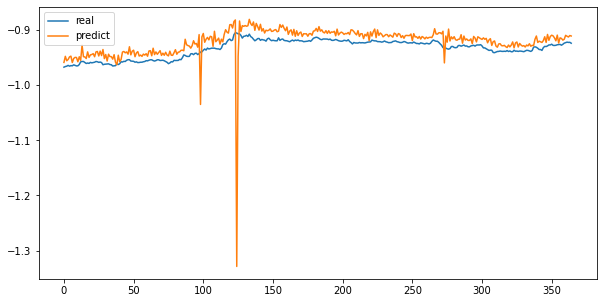

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(target2)
plt.plot(model.predict(data2))
plt.legend(['real', 'predict'])

In [ ]:
model.predict(data)

array([[ 73703.27 ],
       [ 71389.1  ],
       [ 71682.76 ],
       ...,
       [ 73036.35 ],
       [133767.48 ],
       [ 58237.355]], dtype=float32)

In [ ]:
data2[-1].shape

(10, 5)

In [ ]:
model.predict(data2[-1].reshape(1, 10, 5)) / target2[-1] * stock2[-1][0]

array([[79757.234]], dtype=float32)

In [ ]:
# 오를 주식
# 3000개 -> 1000개 -> 500개
# 1주씩

# 10일치 모델
# 20일치 모델
# 30일치 모델

In [ ]:
pip install finterstellar

     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import finterstellar as fs

In [ ]:
df = fs.get_price('AAPL', start_date = '2018-01-01', end_date = '2020-12-31')
df

Symbols,AAPL
Date,
2018-01-02,43.06
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59
...,...
2020-12-24,131.97
2020-12-28,136.69
2020-12-29,134.87


In [ ]:
df = fs.get_price('AAPL')
df

Symbols,AAPL
Date,
2020-12-29,134.87
2020-12-30,133.72
2020-12-31,132.69
2021-01-04,129.41
2021-01-05,131.01
...,...
2021-12-21,172.99
2021-12-22,175.64
2021-12-23,176.28


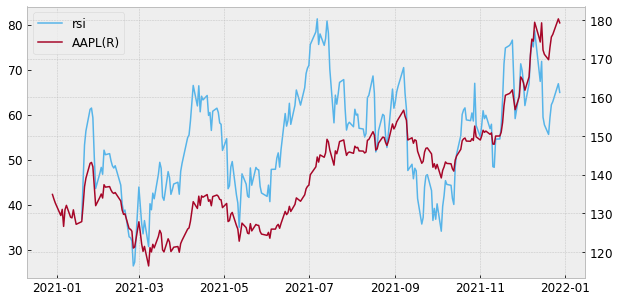

In [ ]:
fs.rsi(df)
fs.draw_chart(df, left = 'rsi', right = 'AAPL')

In [ ]:
fs.indicator_to_signal(df, factor = 'rsi', buy = 60, sell = 40)

Date
2021-01-19    zero
2021-01-20    zero
2021-01-21    zero
2021-01-22    zero
2021-01-25     buy
              ... 
2021-12-21     buy
2021-12-22     buy
2021-12-23     buy
2021-12-27     buy
2021-12-28     buy
Name: trade, Length: 239, dtype: object

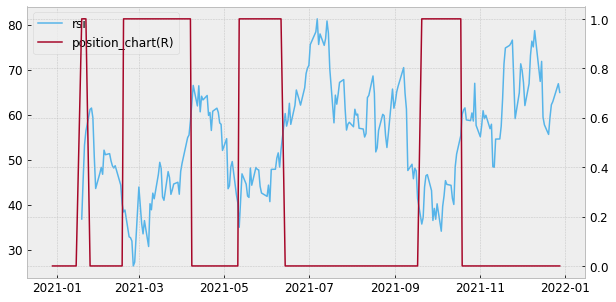

In [ ]:
fs.position(df)
fs.draw_chart(df, left = 'rsi', right = 'position_chart')

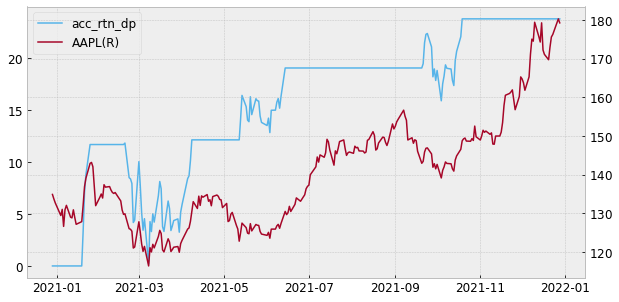

In [ ]:
fs.evaluate(df, cost = 0.001) # cost : 거래수수료 0.1%
fs.draw_chart(df, left = 'acc_rtn_dp', right = 'AAPL')

In [ ]:
fs.performance(df, rf_rate = 0.01) # rf_rate 무위험 이자율

CAGR: 25.32%
Accumulated return: 23.79%
Average return: 5.56%
Benchmark return : 40.26%
Number of trades: 4
Number of win: 4
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 1.25
MDD: -10.40%
Benchmark MDD: -18.72%


CAGR: 13.31%
Accumulated return: 12.51%
Average return: -1.94%
Benchmark return : 40.26%
Number of trades: 4
Number of win: 1
Hit ratio: 25.00%
Investment period: 0.9yrs
Sharpe ratio: 0.54
MDD: -15.39%
Benchmark MDD: -18.72%


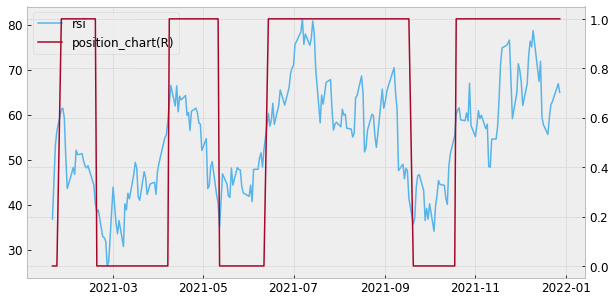

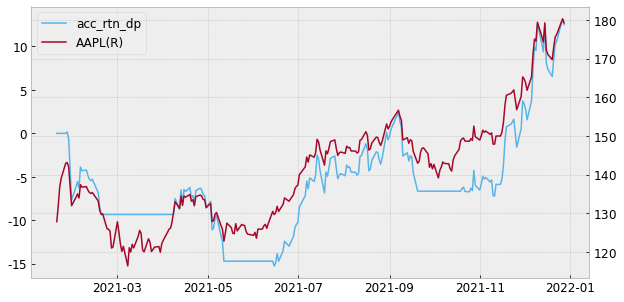

In [ ]:
fs.indicator_to_signal(df, factor = 'rsi', buy = 60, sell = 40)
fs.position(df)
fs.evaluate(df, cost = 0.001) # cost : 거래수수료 0.1%
fs.performance(df, rf_rate = 0.01) # rf_rate 무위험 이자율
fs.draw_chart(df, left = 'rsi', right = 'position_chart')
fs.draw_chart(df, left = 'acc_rtn_dp', right = 'AAPL')

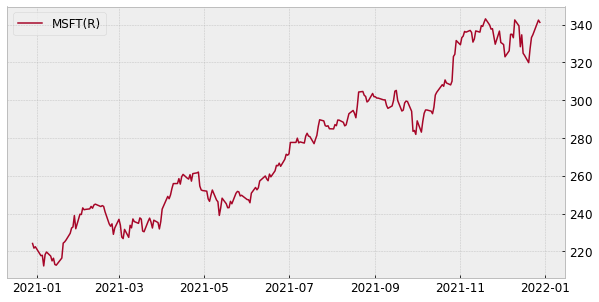

In [ ]:
symbol = 'MSFT'
df = fs.get_price(symbol)
fs.draw_chart(df, right = symbol)

In [ ]:
# MACD 이동평균수렴확산지수

fs.macd(df)

Symbols,MSFT,macd,macd_signal,macd_oscillator
Date,,,,
2020-12-29,224.15,0.00,0.00,0.00
2020-12-30,221.68,-0.06,-0.03,-0.03
2020-12-31,222.42,-0.05,-0.04,-0.01
2021-01-04,217.69,-0.21,-0.10,-0.11
2021-01-05,217.90,-0.29,-0.15,-0.14
...,...,...,...,...
2021-12-21,327.29,-0.63,1.11,-1.74
2021-12-22,333.20,-0.26,0.83,-1.09
2021-12-23,334.69,0.16,0.70,-0.54


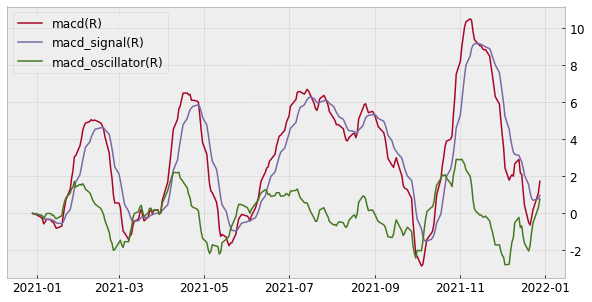

In [ ]:
fs.draw_chart(df, right = ['macd', 'macd_signal', 'macd_oscillator'])

In [ ]:
fs.indicator_to_signal(df, factor = 'macd_oscillator', buy = 0, sell = 0)

Date
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
2021-01-04    zero
2021-01-05    zero
              ... 
2021-12-21    zero
2021-12-22    zero
2021-12-23    zero
2021-12-27     buy
2021-12-28     buy
Name: trade, Length: 252, dtype: object

CAGR: 37.40%
Accumulated return: 37.40%
Average return: 4.27%
Benchmark return : 52.24%
Number of trades: 9
Number of win: 4
Hit ratio: 44.44%
Investment period: 1.0yrs
Sharpe ratio: 2.38
MDD: -5.24%
Benchmark MDD: -8.77%


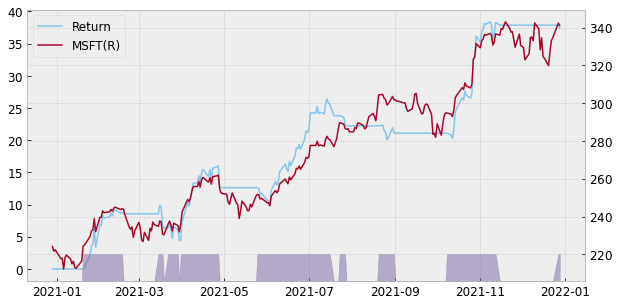

In [ ]:
fs.position(df)

fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.01)
fs.draw_trade_results(df)

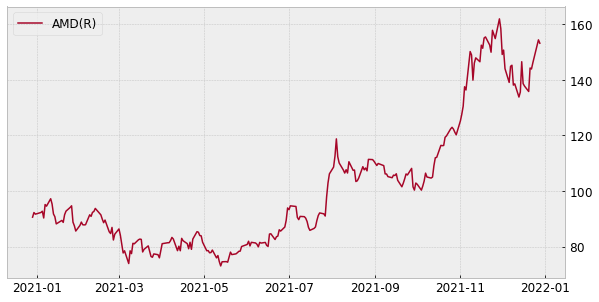

In [ ]:
symbol = 'AMD'
df = fs.get_price(symbol)
fs.draw_chart(df, right = symbol)

fs.envelope(df, spread = 0.05) # 5%
fs.draw_band_chart(df) 

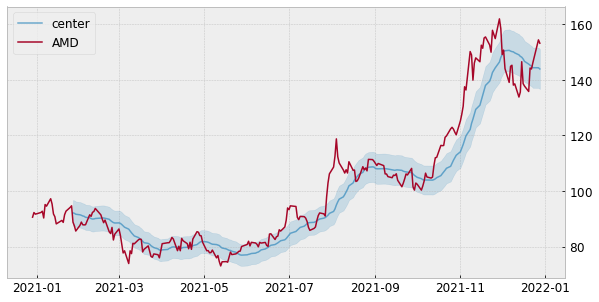

In [ ]:
fs.envelope(df, spread = 0.05, w = 20) # 5%
fs.draw_band_chart(df) 

In [ ]:
fs.band_to_signal(df, buy = 'D', sell = 'B')

Date
2021-01-27    zero
2021-01-28    zero
2021-01-29     buy
2021-02-01     buy
2021-02-02     buy
              ... 
2021-12-21     buy
2021-12-22     buy
2021-12-23    zero
2021-12-27    zero
2021-12-28    zero
Name: trade, Length: 233, dtype: object

CAGR: 28.27%
Accumulated return: 25.95%
Average return: 3.97%
Benchmark return : 72.39%
Number of trades: 6
Number of win: 5
Hit ratio: 83.33%
Investment period: 0.9yrs
Sharpe ratio: 1.01
MDD: -14.93%
Benchmark MDD: -24.84%


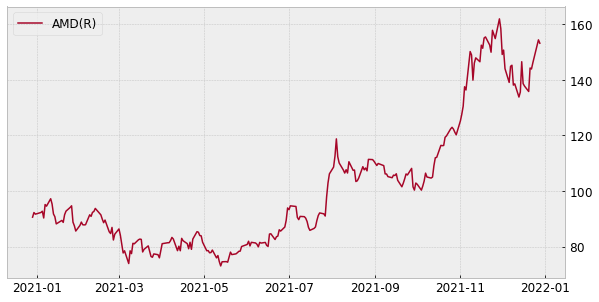

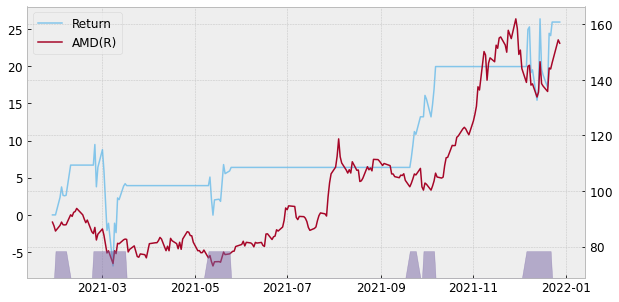

In [ ]:
symbol = 'AMD'
df = fs.get_price(symbol) # 1
fs.draw_chart(df, right = symbol)

fs.envelope(df, spread = 0.05, w = 20) # 2

fs.band_to_signal(df, buy = 'D', sell = 'B') # A에서 사서 B에서 판다 -- 추세 // D에서 사서 B에서 판다. -- 기대

fs.position(df)
fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.01)
fs.draw_trade_results(df)

CAGR: 28.27%
Accumulated return: 25.95%
Average return: 3.97%
Benchmark return : 72.39%
Number of trades: 6
Number of win: 5
Hit ratio: 83.33%
Investment period: 0.9yrs
Sharpe ratio: 1.01
MDD: -14.93%
Benchmark MDD: -22.05%


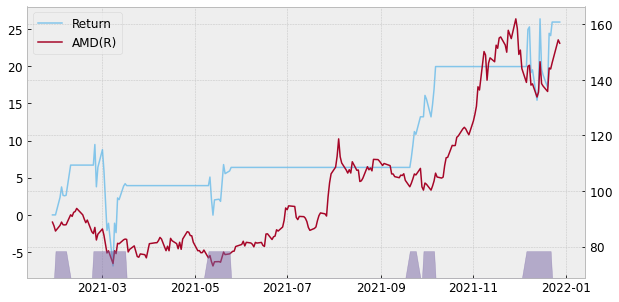

In [ ]:
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

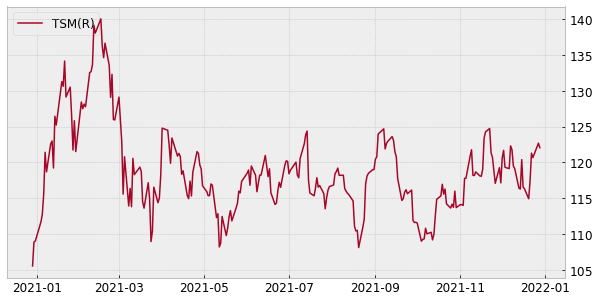

In [ ]:
symbol = 'TSM'
df = fs.get_price(symbol)
fs.draw_chart(df, right = symbol)

In [ ]:
fs.bollinger(df, w = 20, k = 2)

Symbols,TSM,center,ub,lb
Date,,,,
2020-12-29,105.56,nan,nan,nan
2020-12-30,108.90,nan,nan,nan
2020-12-31,109.04,nan,nan,nan
2021-01-04,111.70,nan,nan,nan
2021-01-05,112.77,nan,nan,nan
...,...,...,...,...
2021-12-21,117.44,118.88,123.29,114.46
2021-12-22,121.30,118.87,123.28,114.47
2021-12-23,120.68,118.87,123.27,114.47


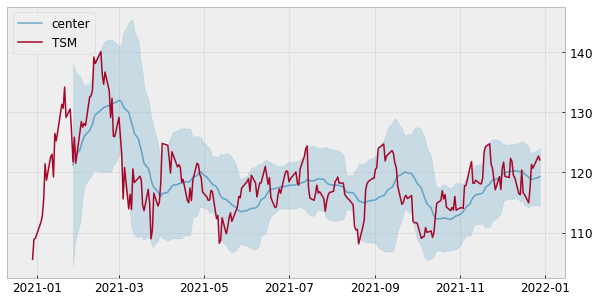

In [ ]:
fs.draw_band_chart(df)

CAGR: 10.76%
Accumulated return: 9.88%
Average return: 2.40%
Benchmark return : 0.26%
Number of trades: 4
Number of win: 4
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -9.80%
Benchmark MDD: -22.80%


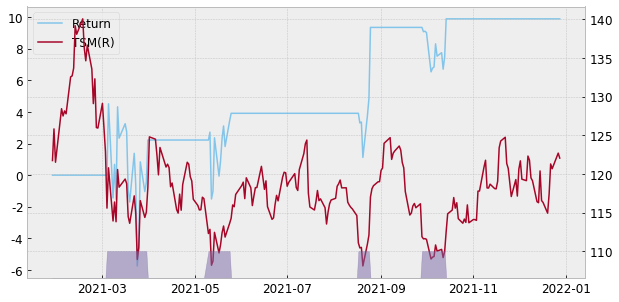

In [ ]:
fs.band_to_signal(df, buy = 'D', sell = 'B') # 3

fs.position(df)
fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.01)
fs.draw_trade_results(df)

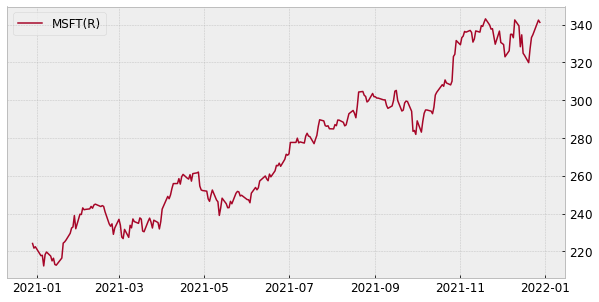

In [ ]:
symbol = 'MSFT'
df = fs.get_price(symbol)
fs.draw_chart(df, right = symbol)

In [ ]:
df = fs.bollinger(df, w = 20, k = 1)
df

Symbols,MSFT,center,ub,lb
Date,,,,
2020-12-29,224.15,nan,nan,nan
2020-12-30,221.68,nan,nan,nan
2020-12-31,222.42,nan,nan,nan
2021-01-04,217.69,nan,nan,nan
2021-01-05,217.90,nan,nan,nan
...,...,...,...,...
2021-12-21,327.29,331.25,337.32,325.18
2021-12-22,333.20,331.03,336.93,325.13
2021-12-23,334.69,330.87,336.61,325.12


In [ ]:
df['s1'] = fs.band_to_signal(df, buy = 'A', sell = 'B')
df['s2'] = fs.band_to_signal(df, buy = 'D', sell = 'B')

fs.combine_signal_or(df, 's1', 's2')

Symbols,MSFT,center,ub,lb,trade,s1,s2
Date,,,,,,,
2020-12-29,224.15,nan,nan,nan,zero,zero,zero
2020-12-30,221.68,nan,nan,nan,zero,zero,zero
2020-12-31,222.42,nan,nan,nan,zero,zero,zero
2021-01-04,217.69,nan,nan,nan,zero,zero,zero
2021-01-05,217.90,nan,nan,nan,zero,zero,zero
...,...,...,...,...,...,...,...
2021-12-21,327.29,331.25,337.32,325.18,buy,zero,buy
2021-12-22,333.20,331.03,336.93,325.13,zero,zero,zero
2021-12-23,334.69,330.87,336.61,325.12,zero,zero,zero


CAGR: 38.90%
Accumulated return: 35.70%
Average return: 1.40%
Benchmark return : 46.52%
Number of trades: 24
Number of win: 13
Hit ratio: 54.17%
Investment period: 0.9yrs
Sharpe ratio: 1.84
MDD: -9.91%
Benchmark MDD: -8.77%


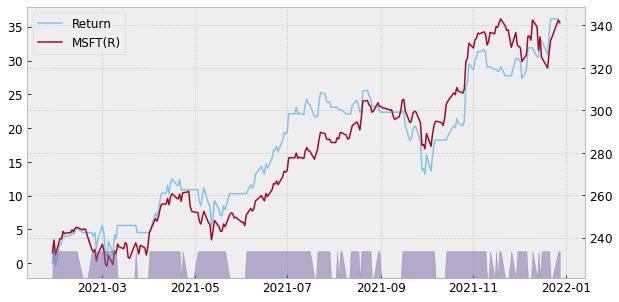

In [ ]:
fs.position(df)
fs.evaluate(df, cost = 0.001)
fs.performance(df, rf_rate = 0.01)
fs.draw_trade_results(df)

In [ ]:
# AMD

# 리사수

# 1. CPU 인텔 O
# 2. 그래픽카드 엔비디아 X
# 3. 슈퍼컴퓨터 X